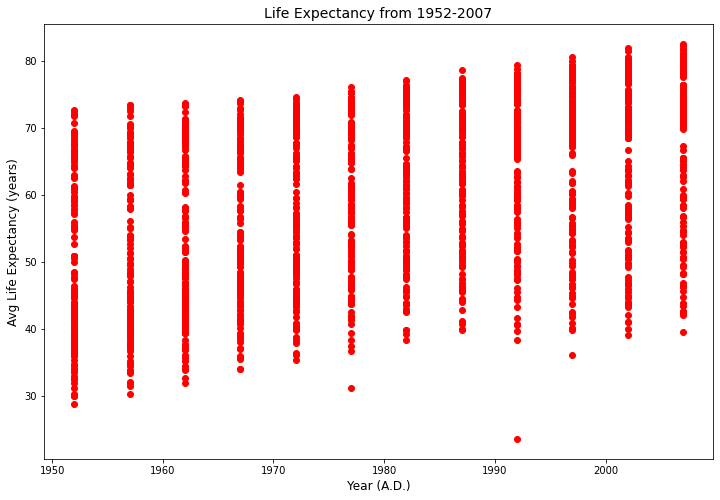

In [3]:

# CMSC320 HW3
# Part 1
# Exercise 1
import pandas as pd
import matplotlib.pyplot as pyplot
data_p3 = pd.read_csv("gap.tsv", sep='\t')
table = data_p3[['year', 'lifeExp']].reset_index(drop=True)
xVals = table['year'].values
yVals = table['lifeExp'].values
pyplot.figure(figsize=(12,8))
pyplot.plot(xVals, yVals, 'o', color='red')
pyplot.xlabel("Year (A.D.)", fontsize=12)
pyplot.ylabel("Avg Life Expectancy (years)", fontsize=12)
pyplot.title("Life Expectancy from 1952-2007", fontsize=14)
pyplot.show()
#print(table)

Figure(432x288)


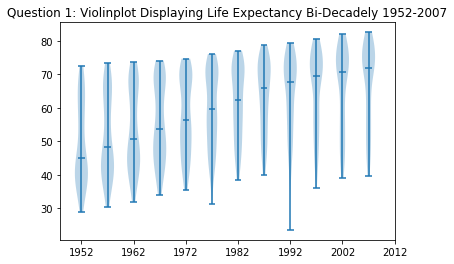

In [4]:
# Question 1
# Generally, we can see that there is a constant increase in life expectancy over time.
# This looks to be generally linear, as the trend seems to be relatively constant,
# and aside for some outliers, seems to be the trend for nearly all countries observed.
# This can be shown better in a violin plot.
import numpy as np
vp_data = pd.read_csv("gap.tsv", sep='\t')
fig,ax = pyplot.subplots()
ax.violinplot(dataset= [vp_data[vp_data.year == 1952]["lifeExp"].values,
      vp_data[vp_data.year == 1957]["lifeExp"].values,
      vp_data[vp_data.year == 1962]["lifeExp"].values,
      vp_data[vp_data.year == 1967]["lifeExp"].values,
      vp_data[vp_data.year == 1972]["lifeExp"].values,
      vp_data[vp_data.year == 1977]["lifeExp"].values,
      vp_data[vp_data.year == 1982]["lifeExp"].values,
      vp_data[vp_data.year == 1987]["lifeExp"].values,
      vp_data[vp_data.year == 1992]["lifeExp"].values,
      vp_data[vp_data.year == 1997]["lifeExp"].values,
      vp_data[vp_data.year == 2002]["lifeExp"].values,
      vp_data[vp_data.year == 2007]["lifeExp"].values], showmedians=True)
ax.set_title('Question 1: Violinplot Displaying Life Expectancy Bi-Decadely 1952-2007')
ax.set_xticks(np.arange(1, 15, 2))
ax.set_xticklabels(np.arange(1952, 2017, 10))
print(fig)

In [5]:
# Question 2
# While generally most of the datasets looked like they collectively shifted in unison,
# There were some outliers that skewed some of the distributions. This was most evident
# in 1992, where the lowest life expectancy from every year was found. Aside from
# this extreme outlier however, the trend for the life expectancies by year went from
# being more skewed up in the 1950s and 1960s, to being more skewed downwards by the
# 2000s. This is likely due to greater comunications and trade, while medicine and
# knowledge of the human body increasing exponentially. Due to the graph's shift in skew,
# we do not have a (mostly) symmetric dataset for a year until 1972, which is the most
# symmetric of all of the years. Finally, while most of these years have one peak (unimodal)
# the years before 1977 are bimodal. This signifies the further gaps in technology
# during that era.

# Question 3
# We WOULD reject the null hypothesis, there appears to be a direct correlation.

# Question 4
# It would also be linear.

# Question 5
# The plot would be linear as well, but also standardzied (mean is 0).

In [6]:
# Exercise 2
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
X, Y = np.array(table['year']-1952).reshape(len(table['year']), 1), np.array(table['lifeExp']).reshape(len(table['lifeExp']), 1)
lr = LinearRegression().fit(X,Y)
m = lr.coef_[0]
b = lr.intercept_[0]
print("Linear Regression: y = {0}(x-1952) + {1}".format(m,b))
print("(we subtract x by 1947 since that year is used to make the np arrays for X)")
fixed_table = table
fixed_table['year'] -= 1952
smry = sm.ols(formula="lifeExp ~ year", data=fixed_table).fit()
smry.summary()
#print(smry.summary())

Linear Regression: y = [0.32590383](x-1952) + 50.5120841061755
(we subtract x by 1947 since that year is used to make the np arrays for X)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           7.55e-80
Time:                        15:47:31   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.5121      0.530     95.306      0.000      49.473      51.552
year           0.3259      0.016     19.965      0.000       0.294       0.358
==============================================================================
Omnibus:                      386.124   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.750
Skew:                          -0.268   Prob(JB):                     1.97e-20
Kurtosis:                       2.004   Cond. No.                         61.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Question 6
# Life expectancy, on average, increases at a rate of 0.32590383 years per year

# Question 7
# We would reject the null hypothesis since the p-value is so small (p < .001)

[Text(1, 0, '1952'),
 Text(3, 0, '1962'),
 Text(5, 0, '1972'),
 Text(7, 0, '1982'),
 Text(9, 0, '1992'),
 Text(11, 0, '2002'),
 Text(13, 0, '2012')]

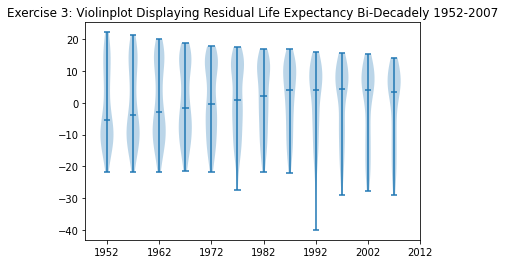

In [8]:
# Exercise 3
resid_data = fixed_table.copy()
# real value minus expected value
resid_data['residual'] = resid_data['lifeExp'] - ((m*resid_data['year']) + b)
fig,ax = pyplot.subplots()
ax.violinplot(dataset= [resid_data[resid_data.year == 0]["residual"].values,
      resid_data[resid_data.year == 5]["residual"].values,
      resid_data[resid_data.year == 10]["residual"].values,
      resid_data[resid_data.year == 15]["residual"].values,
      resid_data[resid_data.year == 20]["residual"].values,
      resid_data[resid_data.year == 25]["residual"].values,
      resid_data[resid_data.year == 30]["residual"].values,
      resid_data[resid_data.year == 35]["residual"].values,
      resid_data[resid_data.year == 40]["residual"].values,
      resid_data[resid_data.year == 45]["residual"].values,
      resid_data[resid_data.year == 50]["residual"].values,
      resid_data[resid_data.year == 55]["residual"].values], showmedians=True)
ax.set_title('Exercise 3: Violinplot Displaying Residual Life Expectancy Bi-Decadely 1952-2007')
ax.set_xticks(np.arange(1, 15, 2))
ax.set_xticklabels(np.arange(1952, 2017, 10))


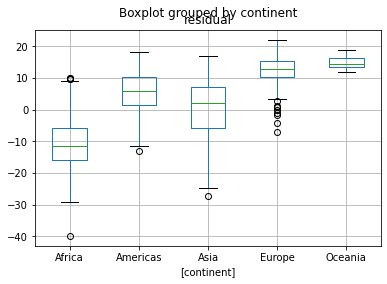

In [14]:
# Question 8
# Yes, since my expectations were for the graph to be linear, which this plot
# mostly appears to be

# Exercise 4
exer_4 = data_p3[['year', 'lifeExp', 'continent']].copy()
exer_4['year'] -= 1952
exer_4['residual'] = exer_4['lifeExp'] - ((m*exer_4['year']) + b)
bp = exer_4[['residual', 'continent']]
bp = bp.boxplot(by='continent')

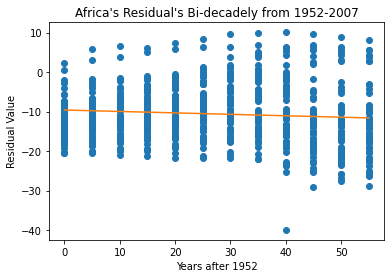

<Figure size 1152x864 with 0 Axes>

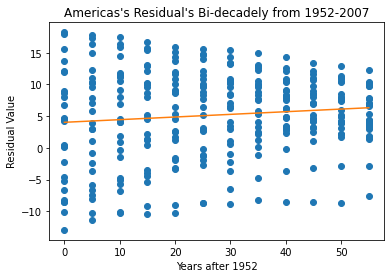

<Figure size 1152x864 with 0 Axes>

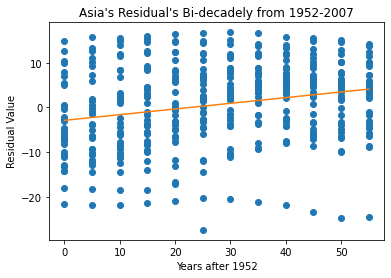

<Figure size 1152x864 with 0 Axes>

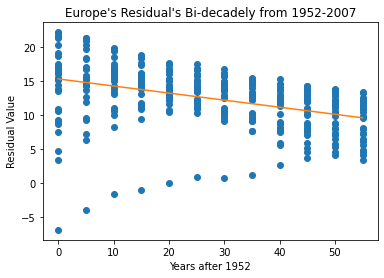

<Figure size 1152x864 with 0 Axes>

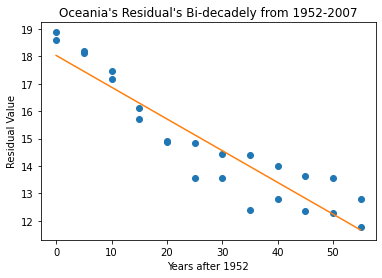

<Figure size 1152x864 with 0 Axes>

In [18]:
# Question 9
# From the boxplot, there does not appear to be much of a trend regarding
# residuals due to solely by continent. However, at the same time we can see that
# the continents with the most % of wealthier countries (Europe, Oceania) have \
# for the most part, higher boxplots than those with less % of wealthier
# countries (Africa). Therefore, it is more likely there is a general trend of
# a country's wealth and their residual life expectancy instead

# Exercise 5
continents=['Africa','Americas','Asia','Europe','Oceania']
for continent in continents:
    e5table = exer_4.groupby(['continent']).get_group(continent)
    plot_x = e5table['year'].values
    plot_y = e5table['residual'].values
    z = np.polyfit(x= plot_x, y= plot_y, deg=1)
    f = np.poly1d(z)
    resid_x = np.linspace(plot_x.min(), plot_x.max(), 100)
    resid_y = f(resid_x)
    pyplot.plot(plot_x, plot_y,'o', resid_x, resid_y)
    pyplot.xlabel("Years after 1952")
    pyplot.ylabel("Residual Value")
    pyplot.title(continent+"'s Residual's Bi-decadely from 1952-2007")
    pyplot.figure(figsize = (16,12))
    pyplot.show()

In [21]:
# Question 10
# There should be an interaction term since the regression lines, mostly the m-values
# (y= mx + b) signify different trends in residual value. We can see a clear decline in
# Europe which would mean the rest of the world in comparison caught up. There is a
# steady increase in Asia, a slight decrease in Oceania, and neutrality in Africa and
# America.

# Exercise 6
e6 = sm.ols(formula= "lifeExp~continent*year", data=exer_4).fit()
e6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:10:20   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     40.9033      0.541     75.656      0.000      39.843      41.964
continent[T.Americas]         13.6451      0.949     14.381      0.000      11.784      15.506
continent[T.Asia]              6.7008      0.868      7.722      0.000       4.999       8.403
continent[T.Europe]           24.8973      0.894     27.854      0.000      23.144      26.650
continent[T.Oceania]          27.6404      2.809      9.839      0.000      22.130      33.150
year                           0.2895      0.017     17.387      0.000       0.257       0.322
continent[T.Americas]:year     0.0781      0.029      2.673      0.008       0.021       0.135
continent[T.Asia]:year         0.1636      0.027      6.121      0.000       0.111       0.216
continent[T.Europe]:year      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
continent[T.Oceania]:year     -0.0793      0.087     -0.916      0.360      -0.249       0.090
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                         562.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Question 11
# Both p-values from Oceania and Europe are significant enough to be different, but
# none of the other p-values are much bigger than zero.

# Question 12
print(e6.params)
print("\n")
print("Average Life Expectancy Increase by Country:")
print("Africa - 0.289529 years per year")
print("America - 0.367651 years per year")
print("Asia - 0.453122 years per year")
print("Europe - 0.221932 years per year")
print("Oceania - 0.210272 years per year")

Intercept                     40.903275
continent[T.Americas]         13.645061
continent[T.Asia]              6.700762
continent[T.Europe]           24.897277
continent[T.Oceania]          27.640443
year                           0.289529
continent[T.Americas]:year     0.078122
continent[T.Asia]:year         0.163593
continent[T.Europe]:year      -0.067597
continent[T.Oceania]:year     -0.079257
dtype: float64


Average Life Expectancy Increase by Country:
Africa - 0.289529 years per year
America - 0.367651 years per year
Asia - 0.453122 years per year
Europe - 0.221932 years per year
Oceania - 0.210272 years per year


This matches up extremely well with the linear regression mode, as expected.


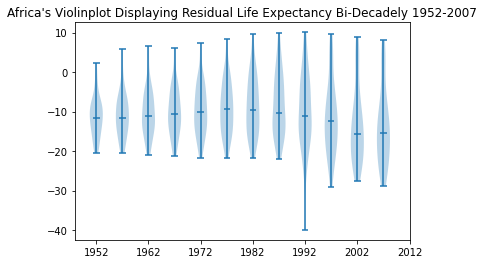

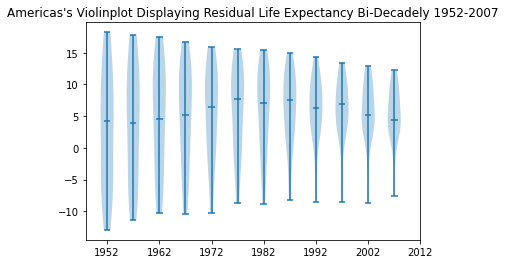

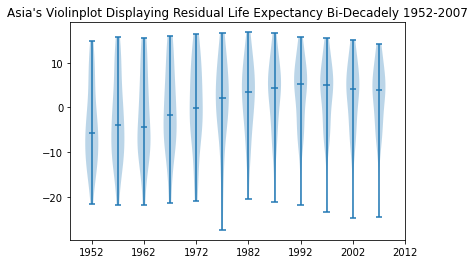

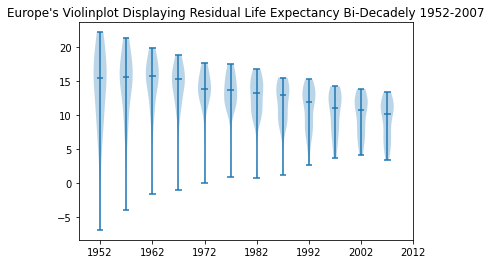

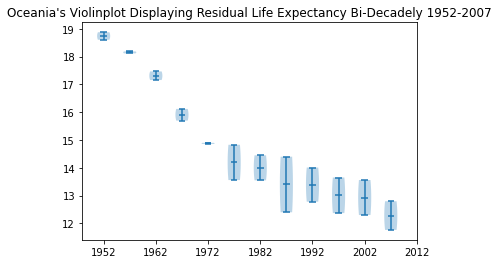

In [44]:
# Exercise 7
for continent in continents:
      e5table = exer_4.groupby(['continent']).get_group(continent)
      fig,ax = pyplot.subplots()
      ax.violinplot(dataset= [e5table[e5table.year == 0]["residual"].values,
            e5table[e5table.year == 5]["residual"].values,
            e5table[e5table.year == 10]["residual"].values,
            e5table[e5table.year == 15]["residual"].values,
            e5table[e5table.year == 20]["residual"].values,
            e5table[e5table.year == 25]["residual"].values,
            e5table[e5table.year == 30]["residual"].values,
            e5table[e5table.year == 35]["residual"].values,
            e5table[e5table.year == 40]["residual"].values,
            e5table[e5table.year == 45]["residual"].values,
            e5table[e5table.year == 50]["residual"].values,
            e5table[e5table.year == 55]["residual"].values], showmedians=True)
      ax.set_title(continent+"'s Violinplot Displaying Residual Life Expectancy Bi-Decadely 1952-2007")
      ax.set_xticks(np.arange(1, 15, 2))
      ax.set_xticklabels(np.arange(1952, 2017, 10))
print("This matches up extremely well with the linear regression mode, as expected.")

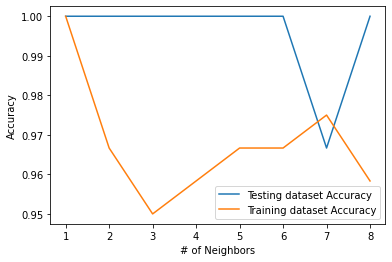

In [39]:
# PART 2
# k-NN algorithm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
li = load_iris()
x= li.data
y= li.target
neighbors = np.arange(1,9)
trainingSet = np.empty(len(neighbors))
testSet = np.empty(len(neighbors))
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
for i, k_val in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k_val)
    knn.fit(train_x, train_y)
    trainingSet[i] = knn.score(train_x, train_y)
    testSet[i] = knn.score(test_x, test_y)
pyplot.plot(neighbors, testSet, label = 'Testing dataset Accuracy')
pyplot.plot(neighbors, trainingSet, label = 'Training dataset Accuracy')
pyplot.legend()
pyplot.xlabel('# of Neighbors')
pyplot.ylabel('Accuracy')
pyplot.show()

0.9800000000000001


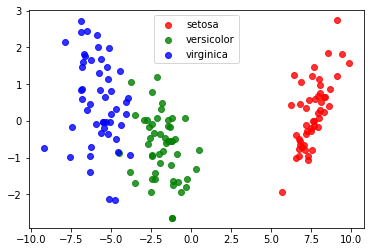

In [38]:
# LDA algorithm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
li = load_iris()
df = pd.DataFrame(data = np.c_[li['data'], li['target']], columns = li['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(li.target, li.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']
x = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']
model = LinearDiscriminantAnalysis()
model.fit(x, y)
cvs = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cvs, n_jobs=-1)
print(+np.mean(scores))
x = li.data
y = li.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(x, y).transform(x)
target_names = li.target_names
pyplot.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    pyplot.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color, label=target_name)
pyplot.legend(loc='best', shadow=False, scatterpoints=1)
pyplot.show()


In [ ]:
# We can see that both algorithms are incredibly accurate. However, while the test
# set for k-NN classification is perfectly accurate, the training set generally has
# lower accuracy that the 98% that LDA provides.